In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the modulated audio
sampling_rate, modulated = wavfile.read('modulated_noisy_audio.wav')
times = np.arange(len(modulated)) / sampling_rate
times,modulated



(array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
        1.98494331e+00, 1.98496599e+00, 1.98498866e+00], shape=(87539,)),
 array([-16539,   4514,   3938, ...,  13695, -16571,  15219],
       shape=(87539,), dtype=int16))

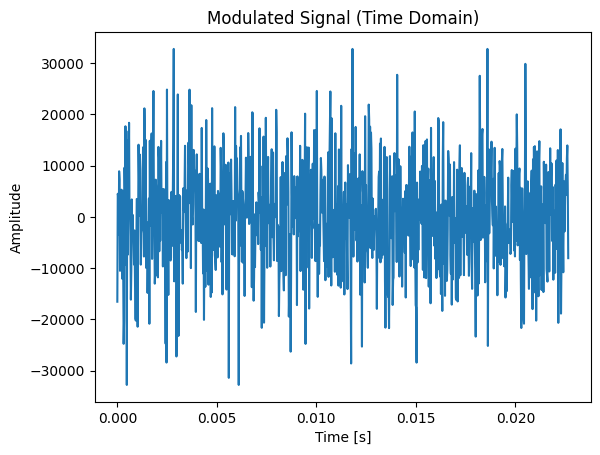

In [16]:
# Plot the raw signal
plt.plot(t[:1000], modulated[:1000])
plt.title('Modulated Signal (Time Domain)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

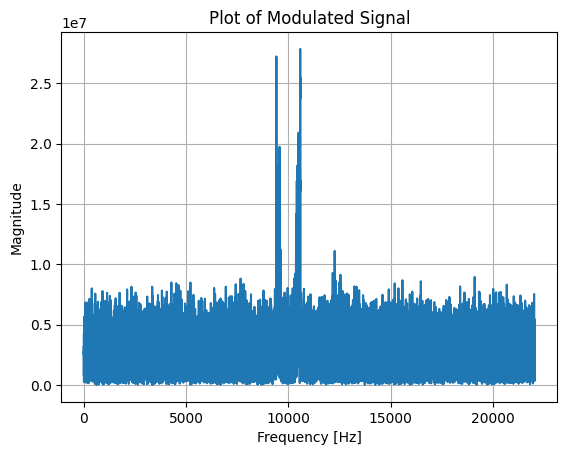

In [17]:
from scipy.fft import fft, fftfreq



N = len(modulated)
yf = fft(modulated)
xf = fftfreq(N, 1/sampling_rate)

# Only keep positive frequencies
idx = np.where(xf > 0)
xf = xf[idx]
yf = np.abs(yf[idx])
plt.plot(xf, yf)
plt.title("Plot of Modulated Signal")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()





In [18]:
# carrier frequency is the frequency with maximum magnitude in case of AM
carrier_frequency = xf[np.argmax(yf)]
carrier_frequency

np.float64(10582.307314454129)

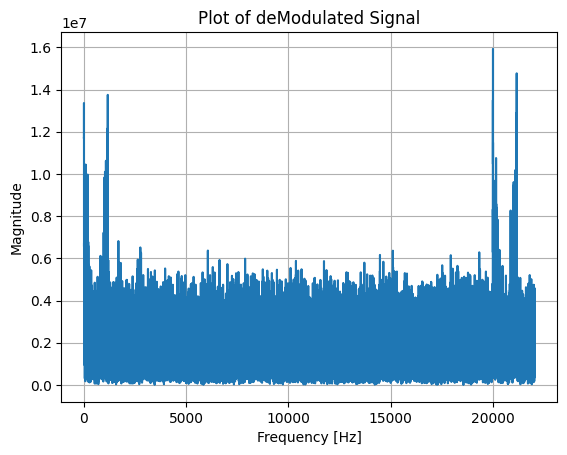

In [19]:
import numpy as np

# Multiply signal by cosine to reverse modulation
demodulated = modulated * np.cos(2 * np.pi * carrier_frequency * times)

# plot the demodulated fft

N = len(demodulated)
yf = fft(demodulated)
xf = fftfreq(N, 1/sampling_rate)

# Only keep positive frequencies
idx = np.where(xf > 0)
xf = xf[idx]
yf = np.abs(yf[idx])
plt.plot(xf, yf)
plt.title("Plot of deModulated Signal")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()



In [20]:
from scipy.signal import butter, sosfiltfilt
from scipy.io.wavfile import write


# Design band-pass filter to remove high freq components
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = sosfiltfilt(sos, data)
    return filtered_data


# I have taken edges for bandpass filter from 300 to 4000 hz

filtered = bandpass(demodulated, edges = [300 , 4000], sample_rate = sampling_rate)


write("filtered_output.wav", sampling_rate, (filtered).astype(np.int16))

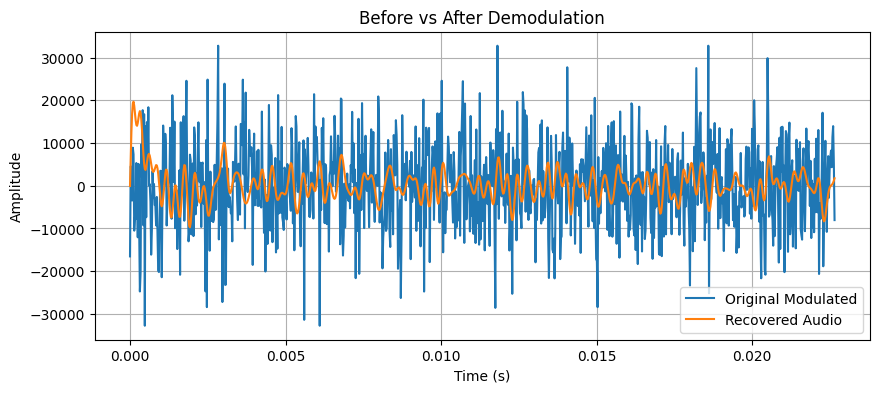

In [ ]:
#plotting before and after demodulation

plt.figure(figsize=(10, 4))
plt.plot(times[:1000], modulated[:1000], label="Original Modulated")
plt.plot(times[:1000], filtered[:1000], label="Recovered Audio")
plt.legend()
plt.title("Before vs After Demodulation")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
